In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fpe

C:\Users\alvin\research\fpe.py:47: RuntimeWarning: divide by zero encountered in log
  log_prob += np.log(self.prob_one(k, M_i, theta_i))
C:\Users\alvin\research\fpe.py:45: RuntimeWarning: divide by zero encountered in log
  log_prob += np.log(self.prob_zero(k, M_i, theta_i))


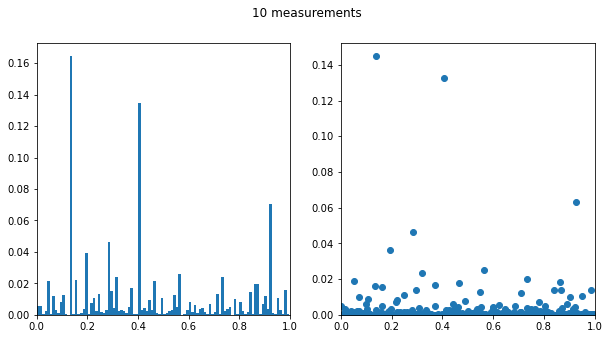

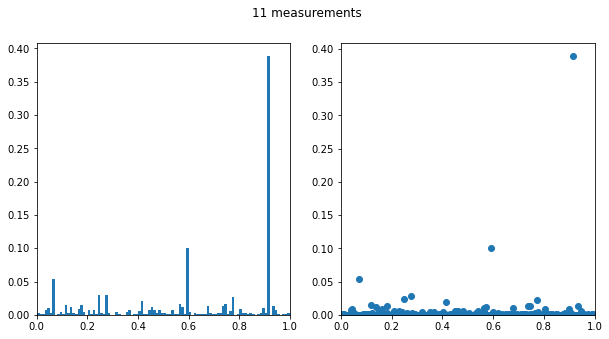

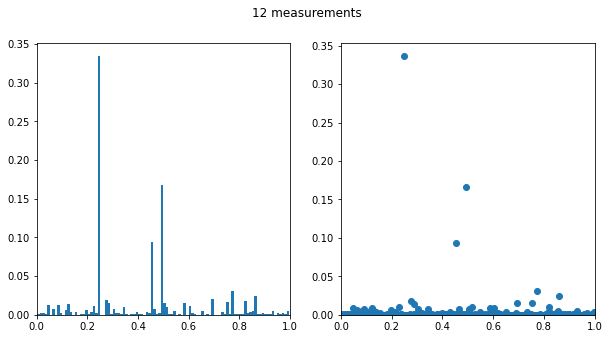

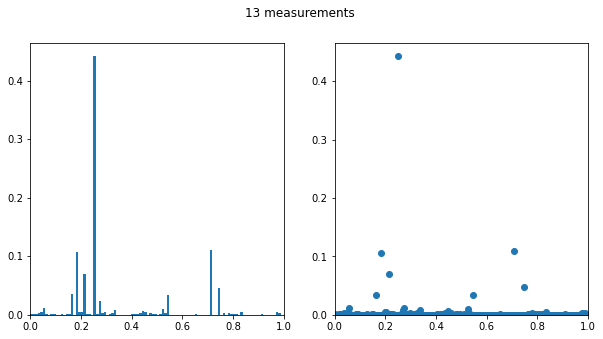

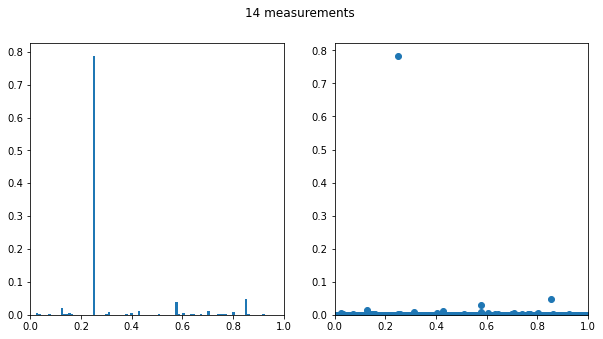

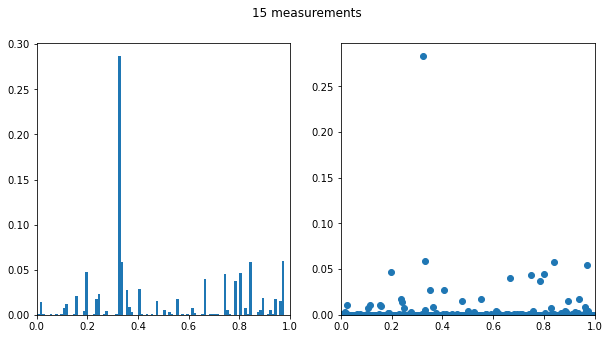

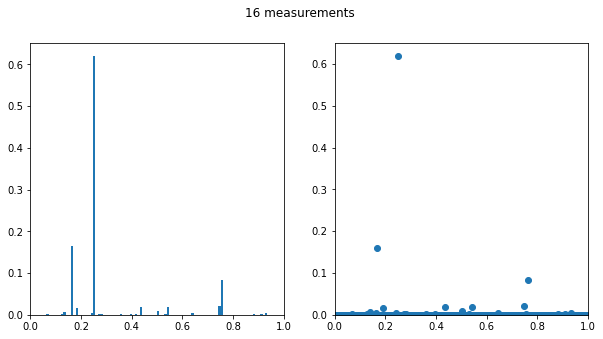

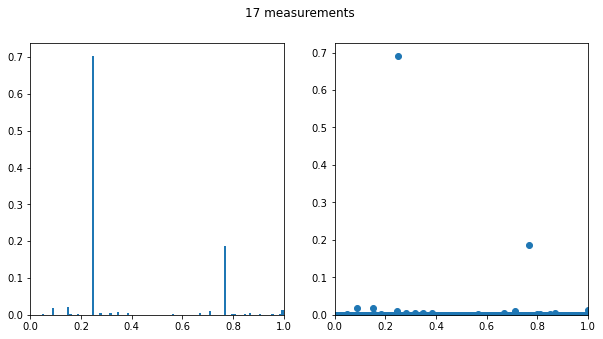

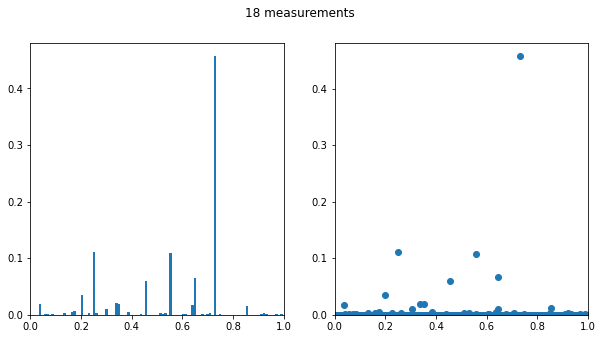

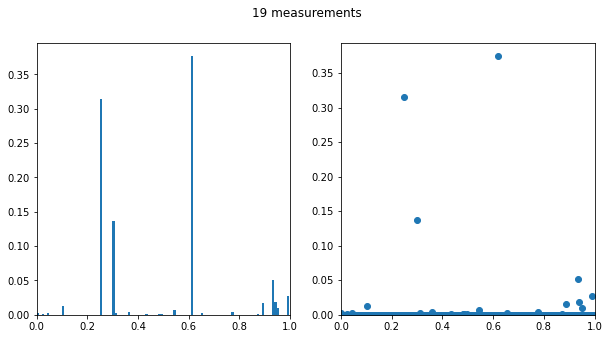

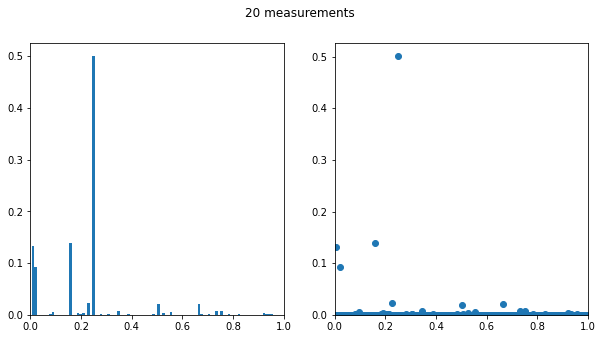

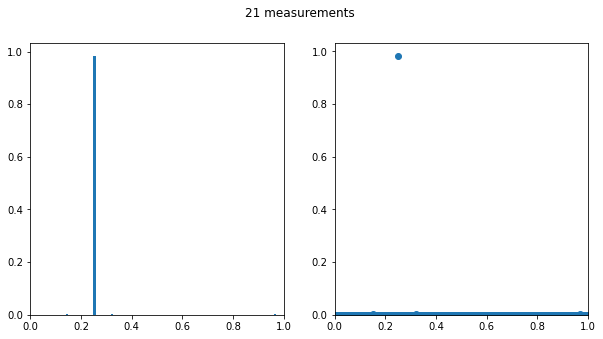

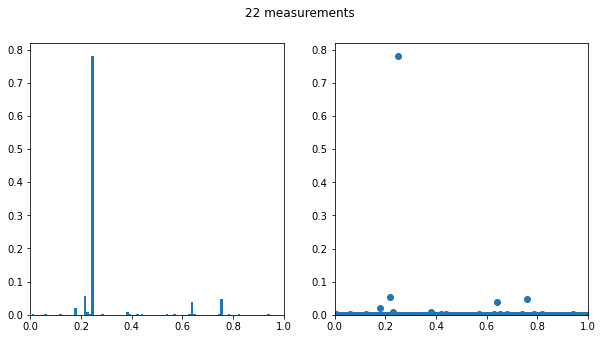

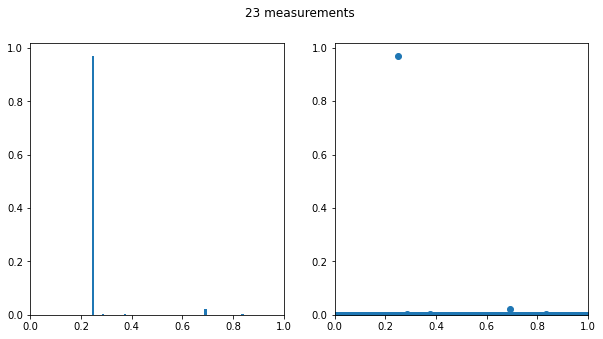

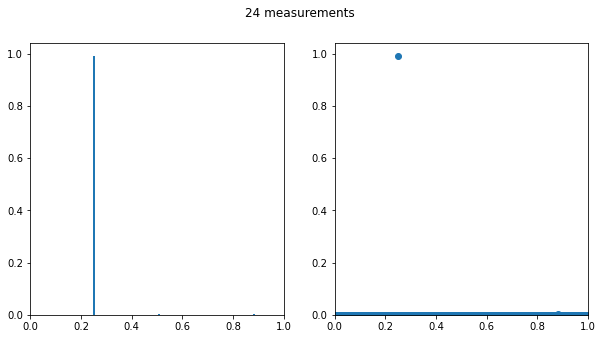

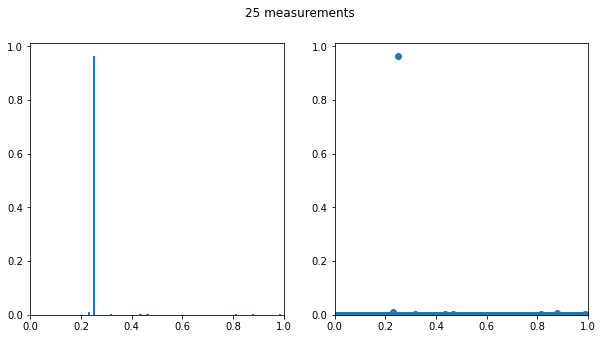

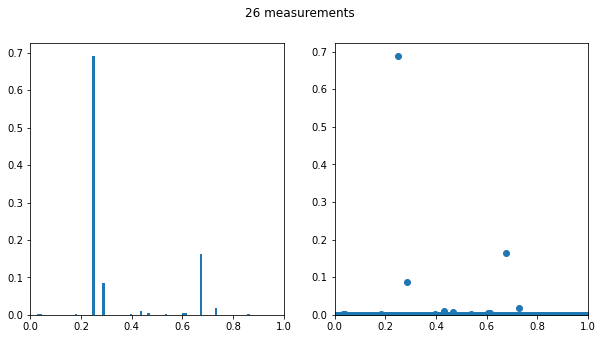

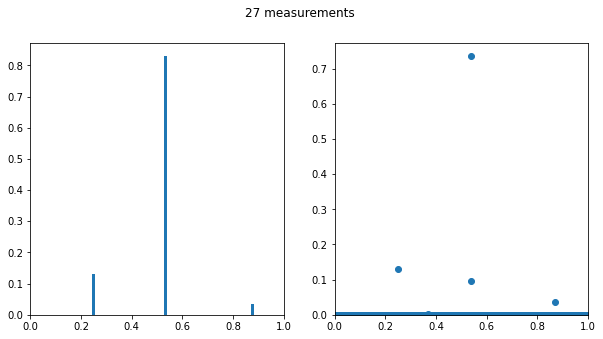

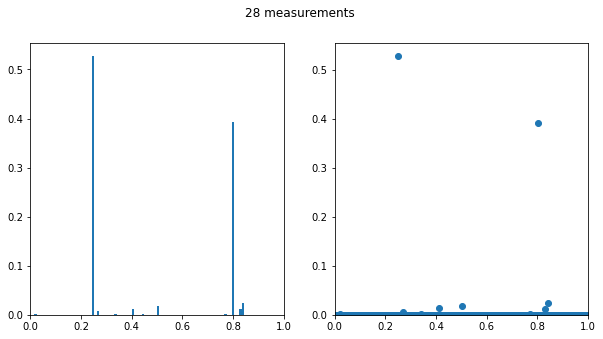

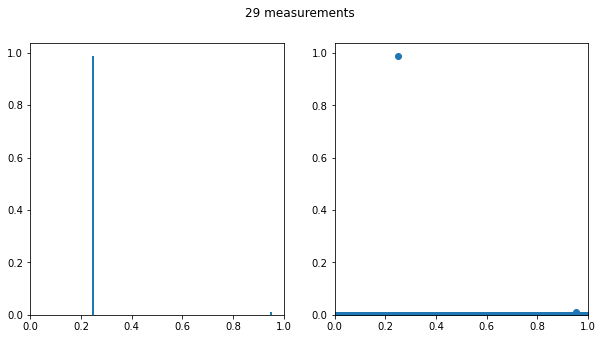

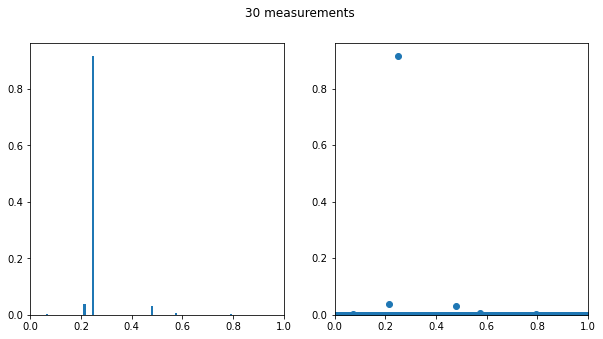

In [2]:
s_array = np.arange(10,31, 1)
k_star = 250
t = 1000
k_array = np.arange(t)/t

for s in s_array:
    experiment = fpe.FPE(k_star, t)
    measure_results, M_array, theta_array = experiment.get_measurements(s)
    log_likelihood = experiment.get_log_likelihood(measure_results, M_array, theta_array)
    likelihood = np.exp(log_likelihood)
    likelihood /= likelihood.sum()
    
    samples = np.random.choice(k_array, size = 100000, p=likelihood)
    bins, edges_ = np.histogram(samples, bins = 100)
    bins = bins/100000
    edges = edges_[:-1]
    edge_width = edges[1] - edges[0]
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
    ax1.bar(edges, bins, align='edge', width = edge_width)
    ax1.set_xlim([0,1])
    ax2.scatter(k_array,likelihood)
    ax2.set_xlim([0,1])
    ax2.set_ylim([0,None])
    fig.suptitle("{:d} measurements".format(s))
    plt.show()
    


In [10]:
t = 1000
M = 600
theta = 0.5 * np.pi
k_array = np.arange(t)/t

fpe_class = fpe.FPE(k_star, t)

In [11]:
# let the measurement be 010010

likelihood = fpe_class.prob_zero(k_array, M, theta)
likelihood *= fpe_class.prob_zero(k_array, M, theta)
likelihood *= fpe_class.prob_one(k_array, M, theta)
likelihood *= fpe_class.prob_zero(k_array, M, theta)
likelihood *= fpe_class.prob_one(k_array, M, theta)
likelihood *= fpe_class.prob_zero(k_array, M, theta)

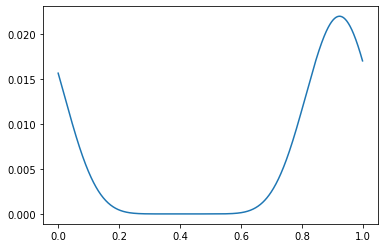

In [12]:
plt.plot(k_array, likelihood)
plt.show()